## Background Information 

Along with Google's search and display networks, Facebook is one of the big players when it comes to online advertising. As Facebook users interact with the platform, adding demographic information, liking particular pages and commenting on specific posts, Facebook builds a profile of that user based on who they are and what they're interested in.

This fact makes Facebook very attractive for advertisers. Advertisers can create Facebook adverts, then create an 'Audience' for that advert or group of adverts. Audiences can be built from a range of attributes including gender, age, location and interests. This specific targetting means advertisers can tailor content appropriately for a specific audience, even if the product being marketed is the same.

For example, let's imagine a company wants to advertise its new car. They may wish to promote one set of features, performance and the 2 kW stereo, to women in their early twenties. They might decide that they want to talk about it's fuel efficiency and reduced emmissions to men in their thirties, and they might want to push the spacious interior and safety rating to men and women in their thirties and early forties who are interested in Families magazine and who like pages of nappy and baby clothes manufacturers.

In 2016, Facebook's revenue from advertising was $26bn, up from  $*17bn the year before. This compares to Google's $79bn the $638m that twitter advertising made in Q4 2016 and $173m that linkedIn made from ads in Q3 2016. These figures illustrate just how big an advertising platform is, although it faces challenges for the future with a decline in younger users in 2017, with generation Z moving to Snapchat and Instagram.


### What do we need from our Facebook ads analysis?
When it comes to analysing the Facebook adverts dataset, there are a lot of questions we can ask, and a lot of insight we can generate. However, from a business perspective we want to ask questions that will give us answers we can use to improve business performance.

Without knowing anything of the company's marketing strategy or campaign objectives, we do not know which key performance indicators (KPIs) are the most important. For example, a new company may be focussed on brand awareness and may want to maximise the amount of impressions, being less concerned about how well these adverts perform in terms of generating clicks and revenue. Another company may simply want to maximise the amount of revenue, while minimising the amount it spends on advertising.

As these two objectives are very different, it is important to work with the client to understand exactly what they are hoping to achieve from their marketing campaigns before beginning any analysis in order to ensure that our conclusions are relevant and, in particular, actionable. There's not much point in producing a report full of insight, if there's nothing the client can do about it.

Let's start by getting the data imported, taking a look, and we'll work through some analyses that should be relevant for a range of objectives.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

### loading the data

In [2]:
df_raw = pd.read_csv("C:\\Users\\RM\\Desktop\\data_science\\KAG_conversion_data.csv")


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
df_raw.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


### Data Variables Description

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


seems there is not any null value in the data set and all the columns have data type of numerical excluding only two.
('age' and 'gender')

doing exploration of those two object  type variables

In [6]:
df=df_raw.copy()

#### exploring age variable

In [7]:
df.age.describe()

count      1143
unique        4
top       30-34
freq        426
Name: age, dtype: object

In [8]:
df.age.unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

there are four uniqe data entry in the variable 'age' 
four age groups are as : 30-34, 35-39, 40-44, 45-49

#### Gender variable

In [9]:
df.gender.unique()

array(['M', 'F'], dtype=object)

column variable 'gender' has only two type of entries where 'M' is directing to male and 'F' is
directing to Female

#### investigating all the variables 

In [10]:
 col =df.columns
for i in col:
    if df[i].nunique()<10:
        print(f'The column "{i}" is of {df[i].dtype} data type and \nhas  #{df[i].nunique()}  unique values:\nas:\n{df[i].value_counts()}')
        print(15*"==")
    else:
        print(f'The column "{i}" is of {df[i].dtype} data type and has\n #{df[i].nunique()} unique entries\n')
        print(15*"==")
        
        

The column "ad_id" is of int64 data type and has
 #1143 unique entries

The column "xyz_campaign_id" is of int64 data type and 
has  #3  unique values:
as:
1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64
The column "fb_campaign_id" is of int64 data type and has
 #691 unique entries

The column "age" is of object data type and 
has  #4  unique values:
as:
30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
The column "gender" is of object data type and 
has  #2  unique values:
as:
M    592
F    551
Name: gender, dtype: int64
The column "interest" is of int64 data type and has
 #40 unique entries

The column "Impressions" is of int64 data type and has
 #1130 unique entries

The column "Clicks" is of int64 data type and has
 #183 unique entries

The column "Spent" is of float64 data type and has
 #869 unique entries

The column "Total_Conversion" is of int64 data type and has
 #32 unique entries

The column "Approved_Conversion" is of int64 

#### we can see the xyz_campaignID has only three type of entries this basically means that company xyz 
#### had been doing three type of campaign let's name them as type1 and type2  and type3 respectively.
#### changing it's data type to category data type

In [11]:
df.xyz_campaign_id = df.xyz_campaign_id.replace({1178:"type1",936:"type2",916:"type3"})

In [12]:
df.xyz_campaign_id=df.xyz_campaign_id.astype(object)
df.xyz_campaign_id.value_counts()

type1    625
type2    464
type3     54
Name: xyz_campaign_id, dtype: int64

##### Going through the data set variables again

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   object 
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 98.4+ KB


##### although we can change 'age' variable to numerical one and so to the'xyz_campaign_id' and  'gender' variable too . The purpose will be to see if the expected variable seems to be related with eachother or not.For example as the spent increases the impression would expectedly increase and this makes sence .we can check our intiution about variables relation through heirarchical clustering or through heatmap.

####  changing datatypes and hierarchical clustering 

In [14]:
df1=df.copy()
df1.age=df1.age.replace({'30-34':32,'35-39':37,'40-44':42,'45-49':47})
df1.xyz_campaign_id =df1.xyz_campaign_id.replace({'type1':1,'type2':2,'type3':3 })
df1.gender =df1.gender.replace({'M':0,'F':1})
df1.age=df1.age.astype(int)
df1.xyz_campaign_id=df1.xyz_campaign_id.astype(int)
df1.gender=df1.gender.astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int32  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   int32  
 4   gender               1143 non-null   int32  
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int32(3), int64(7)
memory usage: 85.0 KB


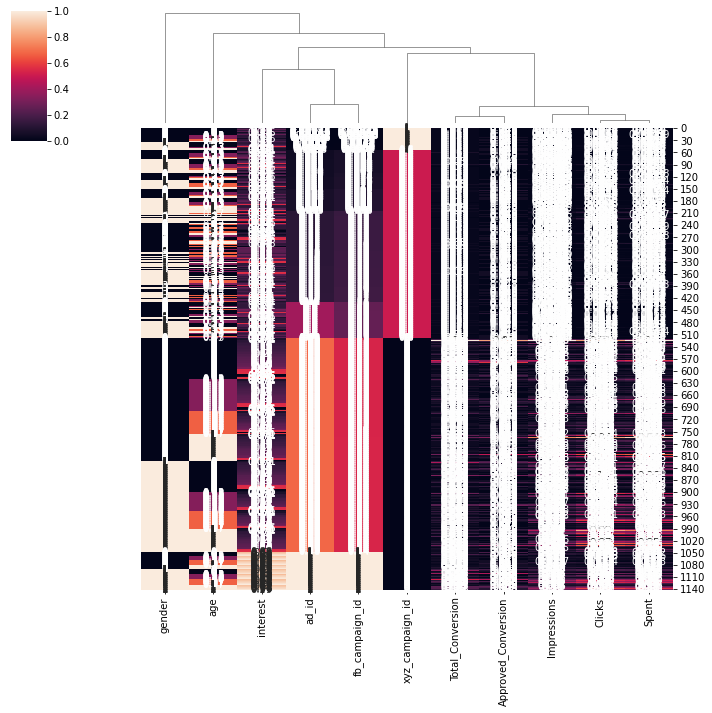

In [15]:
sns.clustermap(df1,
                   figsize=(10, 10),
                   row_cluster=False,annot=True, standard_scale=1)
                

Looking at the hierarchically clustered heatmap above, we can see a lot of what we would expect. All our main metrics fall into one major cluster. Our Approved Conversions and Total Conversions cluster together, and what we spent clusters with impressions and clicks, so our first overview of our dataset suggests that it makes sense.

#### it's time for some feature engineering and let's introduce some additional features with the definitions

#### Creating additional features
##### While we have the main 'building blocks' of our KPIs in the original dataset, there are some standard metrics missing, so let's take the opportunity to add them here.

##### Click-through-rate (CTR). 
This is the percentage of how many of our impressions became clicks. A high CTR is often seen as a sign of good creative being presented to a relevant audience. A low click through rate is suggestive of less-than-engaging adverts (design and / or messaging) and / or presentation of adverts to an inappropriate audience. What is seen as a good CTR will depend on the type of advert (website banner, Google Shopping ad, search network test ad etc.) and can vary across sectors, but 2% would be a reasonable benchmark.
##### Conversion Rate (CR). 
This is the percentage of clicks that result in a 'conversion'. What a conversion is will be determined by the objectives of the campaign. It could be a sale, someone completing a contact form on a landing page, downloading an e-book, watching a video, or simply spending more than a particular amount of time or viewing over a target number of pages on a website.
##### Cost Per Click (CPC). 
####Self-explanatory this one: how much (on average) did each click cost. While it can often be seen as desirable to reduce the cost per click, the CPC needs to be considered along with other variables. For example, a campaign with an average CPC of £0.5 and a CR of 5% is likely achieving more with its budget than one with a CPC of £0.2 and a CR of 1% (assuming the conversion value is the same.
####     #Cost Per Conversion.
Another simple metric, this figure is often more relevant than the CPC, as it combines the CPC and CR metrics, giving us an easy way to quickly get a feel for campaign effectiveness.

There are other values that are also very useful in assessing the performance of a marketing campaign. One of these is the conversion value: how much each conversion is worth. For example, our conversion could be a signup form on a landing page to receive information about a new car. If we know that, on average, 1% of people end up purchasing a car for £10,000, we can use that figure in calculating what our target cost per conversion should be.

For an e-commerce site, we could implement conversion tracking to tie-up the value of specific transactions to particular campaigns, this would allow us to assign the actual amount of revenue generated by each campaign / ad creative.

Knowing the conversion value would allow us to calculate other KPIs such as the Return on Advertising Spend (ROAS). While advertising campaigns have other benefits (such as increased brand awareness and future purchases based on customer lifetime value) that may factor into the over return on investment (ROI), ROAS can quickly tell us how a campaign is paying for itself. It is simply the revenue as a percentage of the advertising spend. If a campaign costs £100 and leads to £400 sales, the ROAS is 400% (or 4).

#### The importance of understanding the client
Of course, using ROAS requires an understanding of the client's business. For some clients, a ROAS of 400% might be a great number, for others, they might not be covering their costs. This is why it is important to understand the margins of products being sold through these campaigns.

If an advertiser is selling a product for £120 (£100 in the UK after taking off the sales tax) that costs them £40, they are making £60 gross profit and a margin of 60%. If their ROAS is 400% (if calculated using the inc. tax figure), the advertising costs associated with that sale are £30, so there is a net profit of £30.

If, on the other hand, the product cost £80 (20% margin), the gross profit is only £20, therefore there is a net loss of £10 (before other business overheads are considered).

These simple examples show why it is important to understand, not only the strategic objectives of the marketing activities, but also how specific campaigns support these objectives and how their effectiveness is to be measured and, in the case of retail, what type of margins the client is working with across its product mix.

#### Create the additional KPIs with dplyr
With the variables we have in the dataset, we can easily create the CTR and CPC figures using the mutate function from the dplyr package:

In [16]:
#Click throuh rate and cost per click column created

df1['CTR']=df1['Clicks']/df1['Impressions'] *100
df1['CPC']=df1['Spent']/df1['Clicks']

In [17]:
df1.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,3,103916,32,0,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,3,103917,32,0,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,3,103920,32,0,20,693,0,0.00,1,0,0.000000,NaN
3,708815,3,103928,32,0,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,3,103928,32,0,28,4133,1,1.29,1,1,0.024195,1.29


#### now we can have a heirarchical clustering map to the correlation between the kpis we created and the ones existed already 

In [18]:
df1.isnull().sum()

ad_id                    0
xyz_campaign_id          0
fb_campaign_id           0
age                      0
gender                   0
interest                 0
Impressions              0
Clicks                   0
Spent                    0
Total_Conversion         0
Approved_Conversion      0
CTR                      0
CPC                    207
dtype: int64

In [19]:
df1.fillna(0,inplace= True)

In [20]:
df1.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,3,103916,32,0,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,3,103917,32,0,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,3,103920,32,0,20,693,0,0.00,1,0,0.000000,0.00
3,708815,3,103928,32,0,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,3,103928,32,0,28,4133,1,1.29,1,1,0.024195,1.29


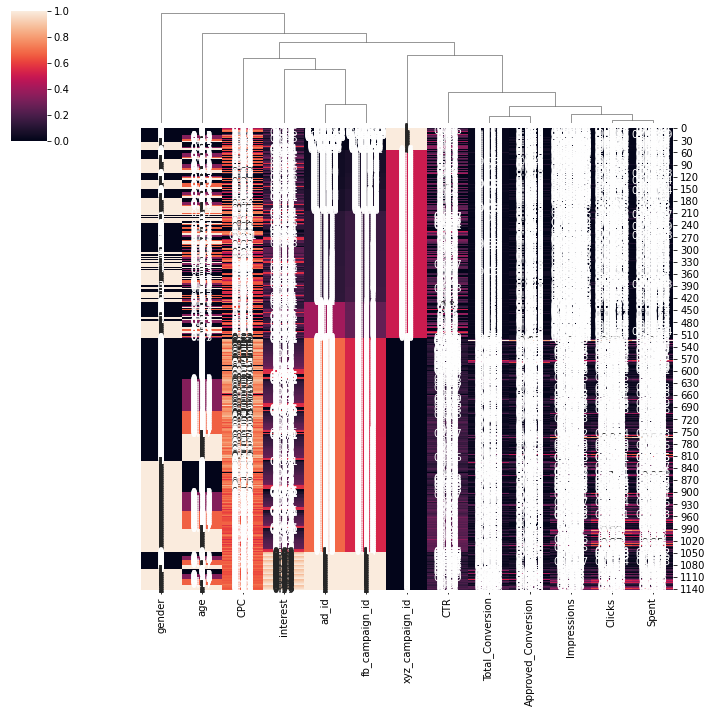

In [21]:
sns.clustermap(df1,
                   figsize=(10, 10),
                   row_cluster=False,annot=True, standard_scale=1)


<AxesSubplot:>

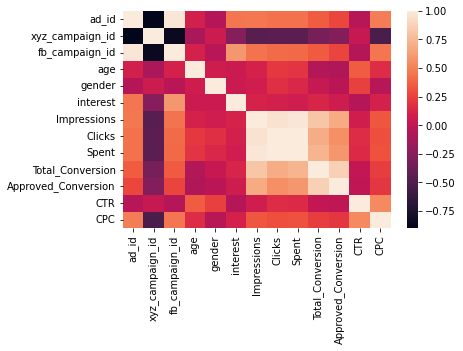

In [22]:
sns.heatmap(data=df1.corr())

As we might expect, we've got some strong correlations between the amount we spent and how many impressions and clicks we got, with less strong correlations between our spend, clicks and impressions and our conversions. so this means not all money spent get converted into revenue. And from this
we can go deep inside  any specific campaign to see where they are spending and where they should spend.
on what age group or gender which specific campaign get more success rate.
for this we are going to see specific details through the particular ad_campaign

From our broad overview of the data, we can see that the more we spend, the more clicks and conversions we seem to get. That's quite reassuring to know, but doesn't really give us the 'actionable insight' we were looking for.

For our next stage in the analysis, we'll look at a specific campaign in more detail and see what we can pull out of it. First of all, let's choose a campaign, the one on which we regularly spend the most money and regularly get the most conversions (and for which we have the most data!) might be a good place to start.

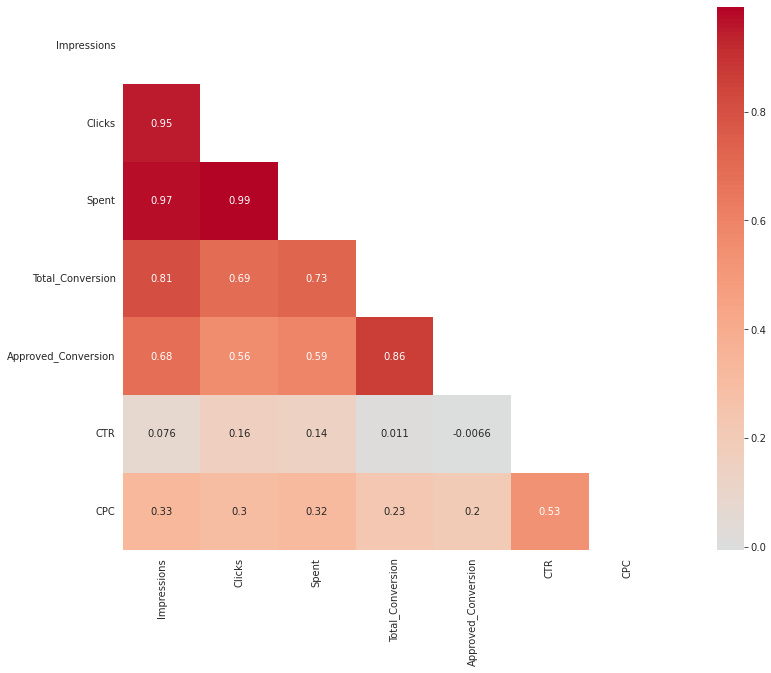

In [23]:
# Correlation matrix
corr = df1[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','CTR','CPC']].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='coolwarm', center=0, square=True,linecolor= 'black')

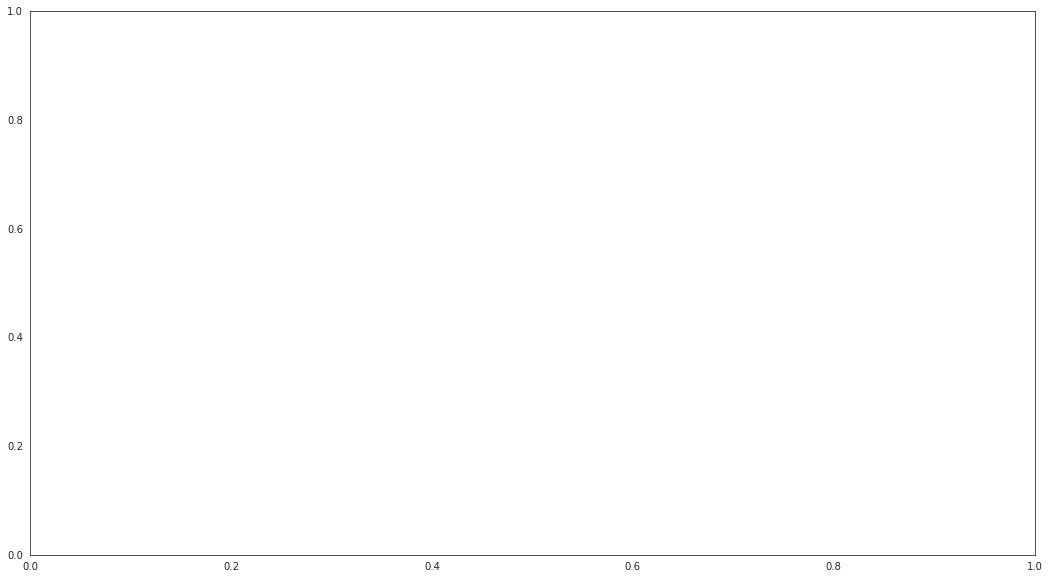

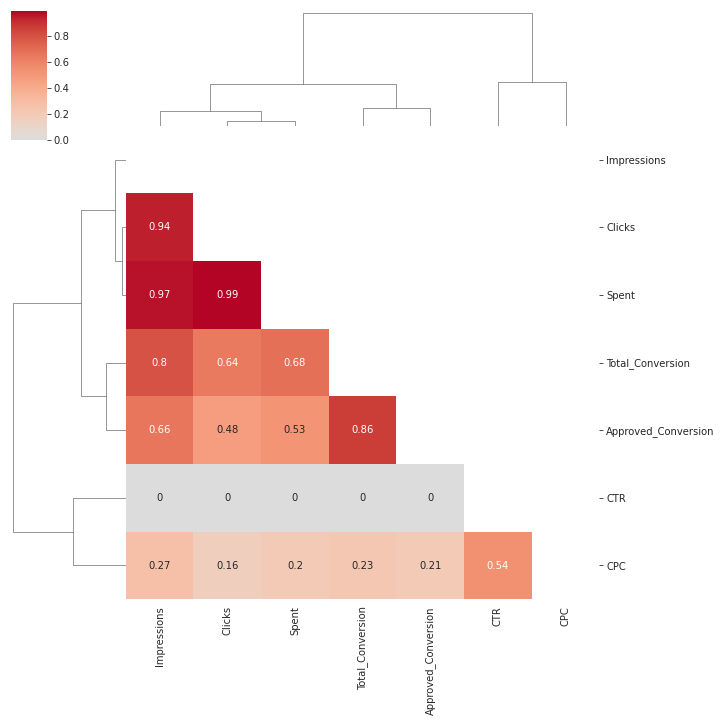

In [24]:
#Correlation matrix
corr = df1[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','CTR','CPC']].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.clustermap(corr,  mask=mask, annot=True, cmap='coolwarm', center=0, square=True,standard_scale=1)

as we have done verifying the general relationships between data made sense so now we can get back to our original dataset( in which there were two object type variable) and Now let's analyese with respect to specific ad_campaign and see what is the impact of the ad campaign on which company had spent more and chcek it's impact on different different variables like age gender and interest.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   object 
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 98.4+ KB


<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Spent'>

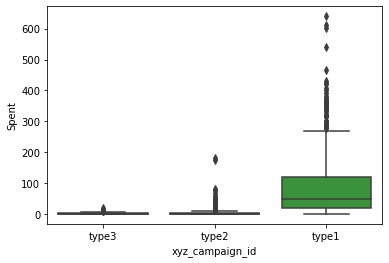

In [26]:
sns.boxplot(y=df['Spent'],x=df['xyz_campaign_id'])


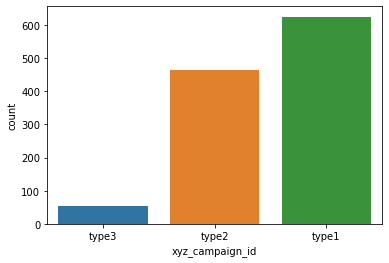

In [48]:
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.show() 

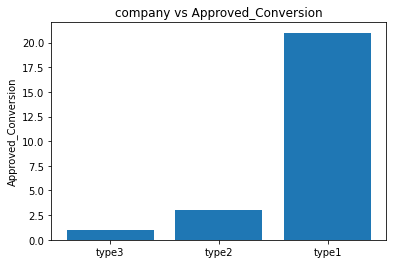

In [49]:
#Approved_Conversion
# Creating our bar plot
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

It's clear from both the above graphs that type1 has better Approved_conversion count, i.e. most people bought products in type1 ad_campaign.



###### looks like we found the ad_campaign on which we are gonna focus and get insight .for that we are going to have only rows having ad_campain of type-1

### More feature engineering
We don't have the actual numbers at our disposal here but assuming the campaign is for an E-commerce company and the purpose is to generate more and more revenue , let's assume that an enquiry *Total conversion* is worth 5 dollor and a sale *approved conversion* is worth 100 dollor
We can now create our conversion value-based variables 

### WE will find an Important KPI called ROAS (return on advertising spent) for parallel analyses

#### formulae to be used in generating ROAS 
 
 ##  total return = total conversion * 5 + approved conversion * 100
 
 ## total spent = sum of total spent amount 
 
 ## ROAS = (total return/total spent) * 100


In [33]:
df_type1=df[df["xyz_campaign_id"] == 'type1']
df_type1.shape

(625, 11)

In [35]:
df['xyz_campaign_id'].value_counts()

type1    625
type2    464
type3     54
Name: xyz_campaign_id, dtype: int64

### time to add an extra column ROAS IN df_type1

In [70]:
df_type1['total_return'] =df_type1['Total_Conversion']*5 + df_type1['Approved_Conversion']*100
df_type1['ROAS'] = (df_type1['total_return']/(df_type1['Spent'] +1))*100
# value 1 in denominator is added so that we may not face a ROAS value of infinite 
#as we dont actually want here the exact value what we want here to see the trend of ROAS with
# different variable;
#

In [71]:
df_type1.head(20)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,total_return,ROAS
518,1121091,type1,144531,30-34,M,10,1194718,141,254.049996,28,14,1540,603.803185
519,1121092,type1,144531,30-34,M,10,637648,67,122.400000,13,5,565,457.860616
520,1121094,type1,144531,30-34,M,10,24362,0,0.000000,1,1,105,10500.000000
521,1121095,type1,144531,30-34,M,10,459690,50,86.330001,5,2,225,257.643418
522,1121096,type1,144531,30-34,M,10,750060,86,161.909999,11,2,255,156.528145
523,1121097,type1,144532,30-34,M,15,30068,1,1.820000,1,0,5,177.304961
524,1121098,type1,144532,30-34,M,15,1267550,123,236.769999,24,10,1120,471.043448
525,1121100,type1,144532,30-34,M,15,3052003,340,639.949998,60,17,2000,312.036821
526,1121101,type1,144532,30-34,M,15,29945,1,1.590000,2,1,110,4247.104193
527,1121102,type1,144532,30-34,M,15,357856,30,52.970000,7,3,335,620.715210


####  now doing some data exploration and seeing the distribution of differet data and correllation of different variables with eachother 

In [72]:
df_type1.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
total_return           0
ROAS                   0
dtype: int64

In [38]:
#Nothing missing, good to know. Let's look at the distributions of our data, variable by variable:

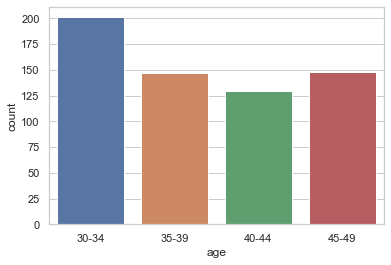

In [73]:
sns.countplot(x ='age', data = df_type1) 
# Show the plot 
plt.show() 

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

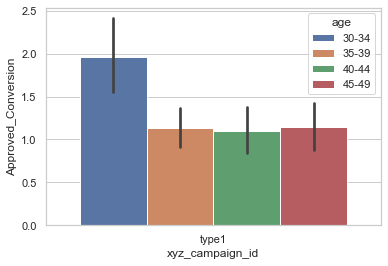

In [74]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df_type1["xyz_campaign_id"], y=df_type1["Approved_Conversion"], hue=df_type1["age"], data=tips)

It's interesting to note that in type1 campaign, age group of 30-34 shows more interest.
we can also see on which age group ad_campaign type2 and type3 affected more.
why leave let's see that insight too.

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

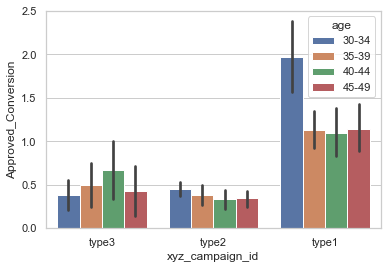

In [76]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

ok so here we see if we want a product to be sold to the  age group of mostly 40-44 years old we can go for type3 ad campaign but although we can't ignore type1 ad_campaign too.

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='ROAS'>

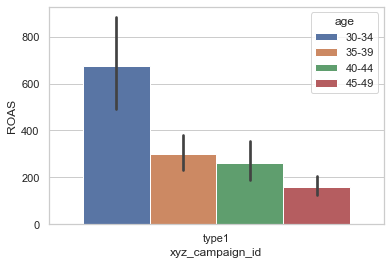

In [77]:
sns.barplot(x=df_type1["xyz_campaign_id"], y=df_type1["ROAS"], hue=df_type1["age"], data=tips)

similar tred as we have seen with the approved conversion

#### time to deal with gender 

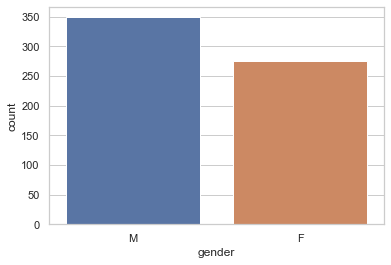

In [53]:
sns.countplot(x ='gender', data = df_type1) 
# Show the plot 
plt.show() 

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

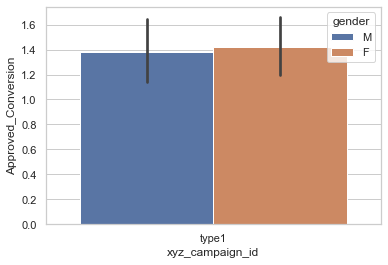

In [81]:

sns.barplot(x=df_type1["xyz_campaign_id"], y=df_type1["Approved_Conversion"], hue=df_type1["gender"], data=tips)


<AxesSubplot:xlabel='xyz_campaign_id', ylabel='ROAS'>

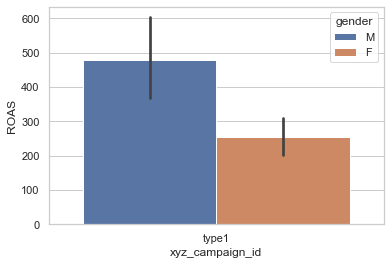

In [82]:
sns.barplot(x=df_type1["xyz_campaign_id"], y=df_type1["ROAS"], hue=df_type1["gender"], data=tips)

In [83]:
#### look this is why we introduced ROAS as seeing only approved conversion we couldn't really 
#derive a crystal conclusion 
!

### Here We Can Say Little Loud That The E-COMMERCE company should spent on type1 advertisement focusing more on age group  of 30-34 and creat more oppurtunity for them by introducing more and more suitable product for Male as well asfemale too but ROAS is more for male crowd.   

In [85]:

columns_to_show = ["ROAS","Approved_Conversion"]
df_type1.groupby(["gender"])[columns_to_show].agg([np.mean, np.median])

ROAS             Approved_Conversion       
              mean      median                mean median
gender                                                   
F       253.952776  121.995235            1.416667    1.0
M       478.079464  186.630472            1.378223    1.0

##### Hypothesis : Male Consumers have not greater ROAS 
#### *after conducting the test p_value came < 0.01 
#### so we can say with a 99% confidence interval that Male consumers have greater ROAS;

#### Time to deal with interest

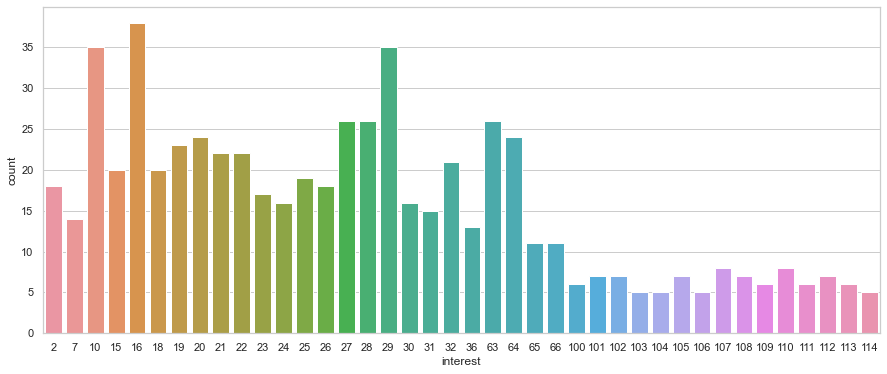

In [86]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='interest', data = df_type1) 
# Show the plot 
plt.show() 

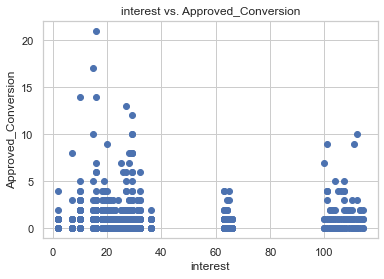

In [89]:
plt.scatter(df_type1["interest"], df_type1["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

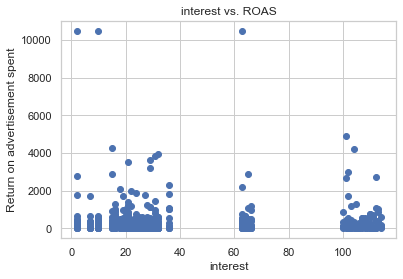

In [90]:
plt.scatter(df_type1["interest"], df_type1["ROAS"])
plt.title("interest vs. ROAS")
plt.xlabel("interest")
plt.ylabel("Return on advertisement spent")
plt.show()

In [96]:
columns_to_show = ["ROAS","Approved_Conversion"]
interest=df_type1.groupby(["interest"])[columns_to_show].agg([np.mean, np.median])
interest.columns

MultiIndex([(               'ROAS',   'mean'),
            (               'ROAS', 'median'),
            ('Approved_Conversion',   'mean'),
            ('Approved_Conversion', 'median')],
           )

In [106]:
interest.sort_values([('ROAS', 'mean')], ascending=False)

ROAS             Approved_Conversion       
                 mean      median                mean median
interest                                                    
101       1272.543492  392.396223            3.571429    4.0
2         1023.010183  266.890475            0.833333    1.0
104        984.054509  272.857393            1.600000    1.0
102        850.306531  411.214950            1.000000    1.0
63         694.224815  167.566137            1.076923    1.0
112        665.493208  318.612268            2.142857    1.0
36         653.221829  312.233894            0.615385    1.0
31         624.700697  330.231162            0.666667    0.0
65         589.032090  420.504599            1.272727    1.0
15         588.579270  245.064954            2.500000    1.0
21         530.719330  215.858446            0.954545    1.0
10         478.795776  135.756056            1.942857    1.0
113        465.821322  335.189247            1.166667    1.0
29         448.274963  237.792852            3.142857    2.0
103        378.802572  233.784316            1.000000    1.0
32         376.024777  154.962314            1.333333    1.0
110        343.924941  246.750256            1.125000    1.0
66         323.769859  126.707800            0.363636    0.0
7          313.895082  211.122977            1.142857    0.5
107        293.320940  237.025322            2.500000    2.5
24         289.016939  207.337320            0.687500    1.0
18         278.212453  134.495889            1.300000    1.0
16         263.717568  129.095780            2.657895    1.5
108        261.578948  233.009709            1.000000    1.0
19         260.833626  105.596622            1.304348    1.0
105        251.857706   45.126354            0.857143    0.0
100        250.750857  112.322121            1.500000    0.5
20         250.283911  202.344540            1.625000    1.0
111        242.333566   42.822382            1.666667    0.0
22         231.278238   37.430962            0.409091    0.0
64         214.479243  124.549082            0.750000    1.0
114        198.048446  135.045917            0.800000    1.0
30         175.408645  171.131186            0.562500    1.0
27         164.163968   52.096660            1.653846    0.5
26         155.437317   79.993945            0.833333    0.0
28         152.912126   66.974432            1.230769    0.5
25         149.718891  118.256561            0.894737    0.0
109        138.862905  103.933632            1.333333    1.5
23         122.789440   33.244681            0.294118    0.0
106        110.817027   30.959752            1.000000    0.0

There are a few interests there that are showing a good ROAS and that have a healthy number of clicks associated with them although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product we'll choose interests 101 as seen in above analyses above